In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/IEEE (EV PROBLEM)/DATA_SET/Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P4C55K,King,Bothell,WA,98011.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0.0,1.0,249382416,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,KNDCE3LG1K,Thurston,Olympia,WA,98502.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239.0,0.0,22.0,102638791,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJYGDEE8L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,112603774,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ0CP0F,Thurston,Olympia,WA,98506.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,22.0,187006893,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10
4,WA1E2AFY8R,King,Seattle,WA,98119.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23.0,0.0,36.0,271736741,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [2]:
# Checking how many rows have Base MSRP as 0 or missing
zero_msrp_count = (df["Base MSRP"] == 0).sum()
missing_msrp_count = df["Base MSRP"].isna().sum()

zero_msrp_count, missing_msrp_count


(220717, 18)

In [3]:
# Remove rows where Base MSRP is zero or missing
df_cleaned = df[df["Base MSRP"] > 0].dropna(subset=["Base MSRP"])

# Check the number of remaining rows
df_cleaned.shape

(3260, 17)

#1️⃣ EV Price Trend Over the Years 📈

In [5]:
# Install Plotly (if not installed)
!pip install plotly --quiet

In [6]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Grouping by Model Year to find the average MSRP per year
price_trend = df_cleaned.groupby("Model Year")["Base MSRP"].mean()

# Creating interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=price_trend.index,
    y=price_trend.values,
    mode='lines+markers',
    marker=dict(size=8, color='blue'),
    line=dict(width=2),
    name='EV Price Trend'
))

# Updating layout for interactivity
fig.update_layout(
    title="EV Price Trend Over the Years",
    xaxis_title="Model Year",
    yaxis_title="Average Base MSRP",
    hovermode="x",
    template="plotly_white",
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

# Display the interactive chart in Google Colab
pio.show(fig)


#3. EV Price Trends by Vehicle Type (BEV vs. PHEV)

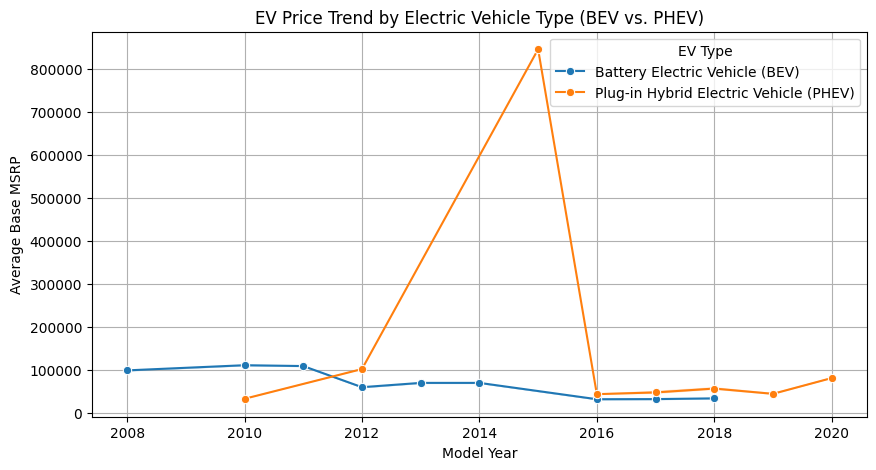

In [15]:
import seaborn as sns

# Visualization 1: EV Price Trend by Electric Vehicle Type (BEV vs. PHEV)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_cleaned, x="Model Year", y="Base MSRP", hue="Electric Vehicle Type", marker="o")
plt.xlabel("Model Year")
plt.ylabel("Average Base MSRP")
plt.title("EV Price Trend by Electric Vehicle Type (BEV vs. PHEV)")
plt.grid(True)
plt.legend(title="EV Type")
plt.show()

#4. Price Trends by Top 5 EV Brands

In [11]:
import matplotlib.pyplot as plt

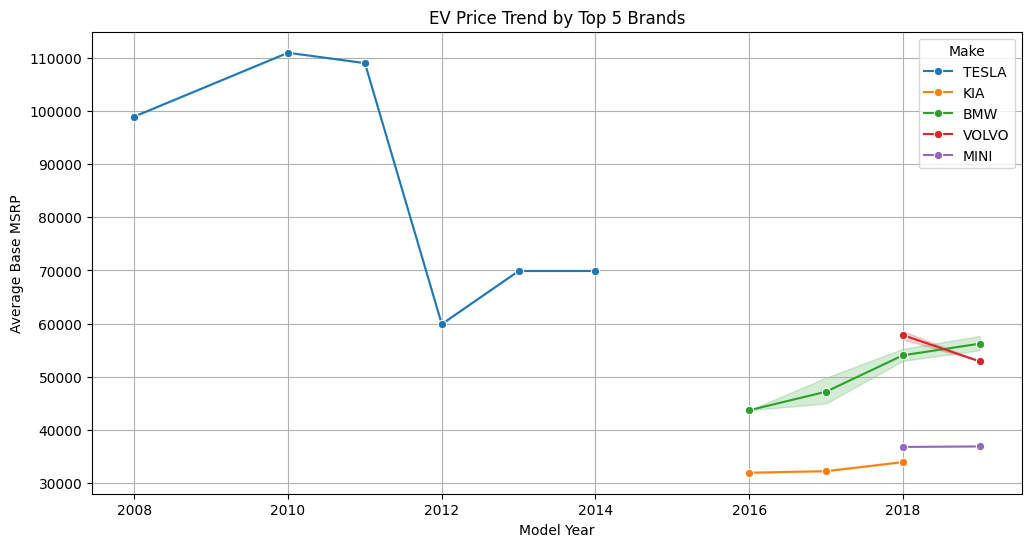

In [12]:
# Visualization 2: EV Price Trend by Make (Top 5 Brands with Most Vehicles)
top_makes = df_cleaned["Make"].value_counts().head(5).index
df_top_makes = df_cleaned[df_cleaned["Make"].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_makes, x="Model Year", y="Base MSRP", hue="Make", marker="o")
plt.xlabel("Model Year")
plt.ylabel("Average Base MSRP")
plt.title("EV Price Trend by Top 5 Brands")
plt.grid(True)
plt.legend(title="Make")
plt.show()

#5. MSRP Distribution by Electric Vehicle Type

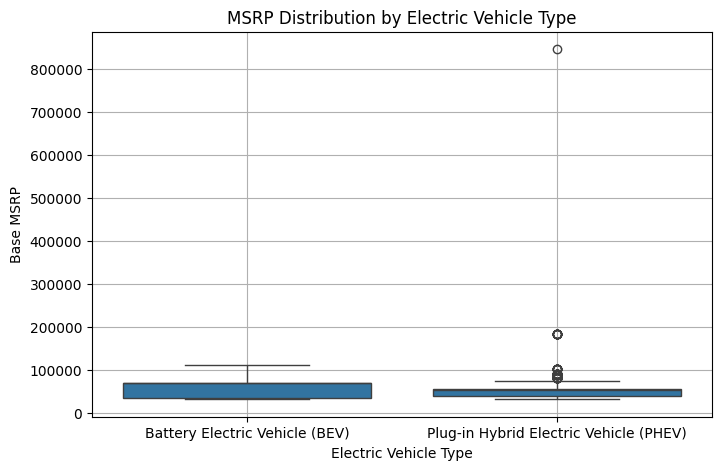

In [13]:
# Visualization 3: MSRP Distribution by Electric Vehicle Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned, x="Electric Vehicle Type", y="Base MSRP")
plt.xlabel("Electric Vehicle Type")
plt.ylabel("Base MSRP")
plt.title("MSRP Distribution by Electric Vehicle Type")
plt.grid(True)
plt.show()

#6. Relationship Between MSRP and Electric Range

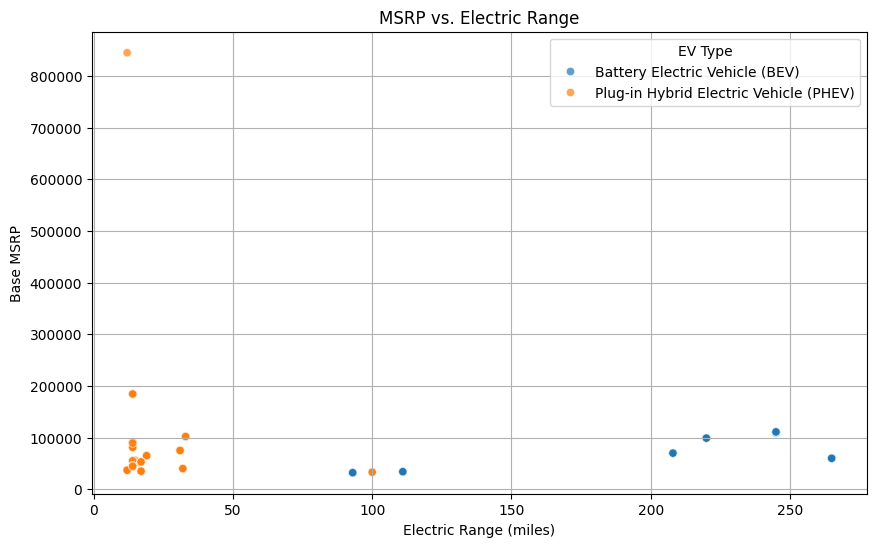

In [14]:
# Visualization 4: MSRP vs. Electric Range (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x="Electric Range", y="Base MSRP", hue="Electric Vehicle Type", alpha=0.7)
plt.xlabel("Electric Range (miles)")
plt.ylabel("Base MSRP")
plt.title("MSRP vs. Electric Range")
plt.grid(True)
plt.legend(title="EV Type")
plt.show()